## CT Scans and Windowing

In [18]:
import pydicom as dicom
import glob
import matplotlib.pyplot as plt
import numpy as np
import cv2

dataset = []
for f in sorted(glob.glob("../data/windowing/Lung-CT-Series/*")):
    x = dicom.dcmread(f)
    dataset.append(x)

# print(dataset.pixel_spacing)
print(dataset[0])


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 256
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.2.1125.1.98679204424154357431924637882025380
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1143.107.104.103.115.2.8.5.111.124.113
(0002, 0013) Implementation Version Name         SH: 'GDCM 2.8.5'
(0002, 0016) Source Application Entity Title     AE: 'GDCM/ITK 4.13.0'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.2.1125.1.9867920442415435743192

In [29]:
print(dataset[100].PixelSpacing)
print(dataset[0].SliceThickness)
print(dataset[0].pixel_array.shape)
print(dataset[0])

[0.761718988418579, 0.761718988418579]
2.5
(512, 512)
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 256
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.2.1125.1.98679204424154357431924637882025380
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1143.107.104.103.115.2.8.5.111.124.113
(0002, 0013) Implementation Version Name         SH: 'GDCM 2.8.5'
(0002, 0016) Source Application Entity Title     AE: 'GDCM/ITK 4.13.0'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    U

In [40]:
dataset = sorted(dataset, key=lambda d: d.ImagePositionPatient[2]) # sorted by last attribute as that was the one that was changing the most

# obtain the pixel spacing from the dataset
PixelSpacing = dataset[0].PixelSpacing
# obtain the slice thickness from the dataset
SliceThickness = dataset[0].SliceThickness

# calculate the axial aspect ratio based on the values you found above: aspect = (column spacing / row spacing)
ax_aspect = PixelSpacing[1]/PixelSpacing[0] # axial aspect 


shape = list(dataset[0].pixel_array.shape)
shape.append(len(dataset))
img_3D = np.zeros(shape)

for i, s in enumerate(dataset):
    img_3D[: , : , i] = s.pixel_array

### Perform windowing for lungs, mediastinum and bones
 - Find out what window levels are required for viewing each of the above optimally
 - Note down your observations in the observation cell provided, in it describe what all can you see in each of the 3 views and how it differs from the normal image without windowing

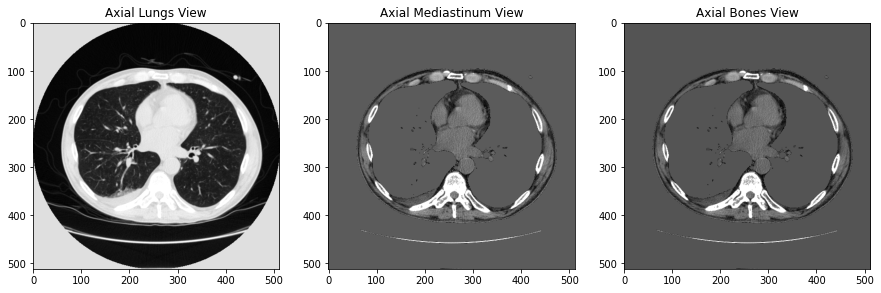

In [41]:
# In the following code, fill in the window level and window width values which will allow you to optimally view the lungs, mediastinum and bones respectively

fig, ax = plt.subplots(1,3, figsize=(15,15))

# lungs
# set window parameters
window_level = -600
window_width = 1500
# calculate max and min visible pixel values such that the max visible pixel is half a window width more than window level
# and the min visible pixel is half a window width less than window level
max_visible_pixel = window_level+window_width/2
min_visible_pixel = window_level-window_width/2
# windowed 3D image 
windowed = img_3D
# set all pixels less than min visible pixel to 0 in the variable windowed
# Hint: np.where
cord =  np.where(img_3D <min_visible_pixel)
windowed[cord] = 0
# set all pixels greater than max visible pixel to 255 in the variable windowed
cord = np.where(img_3D > max_visible_pixel)
windowed[cord] = 255
# perform contrast stretching on the windowed image using interpolation such that the min visible pixel is mapped to 0 and the max visible pixel is mapped to 255 
# Hint: np.interp
windowed = np.interp(windowed, [min_visible_pixel, max_visible_pixel], [0,255])

# plot the windowed image, you don't need to change anything here
a1 = plt.subplot(1,3,1)
plt.title("Axial Lungs View")
plt.imshow(windowed[:, :, windowed.shape[2]//2], cmap="gray")
a1.set_aspect(ax_aspect)

# mediastinum
# set window parameters
window_level = 50
window_width = 350
# calculate max and min visible pixel values such that the max visible pixel is half a window width more than window level
# and the min visible pixel is half a window width less than window level
max_visible_pixel = window_level+window_width/2
min_visible_pixel = window_level-window_width/2
# windowed 3D image 
# windowed 3D image 
windowed = img_3D
# set all pixels less than min visible pixel to 0 in the variable windowed
# Hint: np.where
cord =  np.where(img_3D <min_visible_pixel)
windowed[cord] = 0
# set all pixels greater than max visible pixel to 255 in the variable windowed
cord = np.where(img_3D > max_visible_pixel)
windowed[cord] = 255
# perform contrast stretching on the windowed image using interpolation such that the min visible pixel is mapped to 0 and the max visible pixel is mapped to 255 
# Hint: np.interp
windowed = np.interp(windowed, [min_visible_pixel, max_visible_pixel], [0,255])

# plot the windowed image, you don't need to change anything here
a2 = plt.subplot(1,3,2)
plt.title("Axial Mediastinum View")
plt.imshow(windowed[:, :, windowed.shape[2]//2], cmap="gray")
a2.set_aspect(ax_aspect)

# bones

# set window parameters
window_level = 500
window_width = 2000
# calculate max and min visible pixel values such that the max visible pixel is half a window width more than window level
# and the min visible pixel is half a window width less than window level
max_visible_pixel = window_level+window_width/2
min_visible_pixel = window_level-window_width/2
# windowed 3D image 
# windowed 3D image 
windowed = img_3D
# set all pixels less than min visible pixel to 0 in the variable windowed
# Hint: np.where
cord =  np.where(img_3D <min_visible_pixel)
windowed[cord] = 0
# set all pixels greater than max visible pixel to 255 in the variable windowed
cord = np.where(img_3D > max_visible_pixel)
windowed[cord] = 255
# perform contrast stretching on the windowed image using interpolation such that the min visible pixel is mapped to 0 and the max visible pixel is mapped to 255 
# Hint: np.interp
windowed = np.interp(windowed, [min_visible_pixel, max_visible_pixel], [0,255])
# plot the windowed image, you don't need to change anything here
a3 = plt.subplot(1,3,3)
plt.title("Axial Bones View")
plt.imshow(windowed[:, :, windowed.shape[2]//2], cmap="gray")
a3.set_aspect(ax_aspect)

plt.show()

#### Observations
 - Note down your observations here, double click to edit

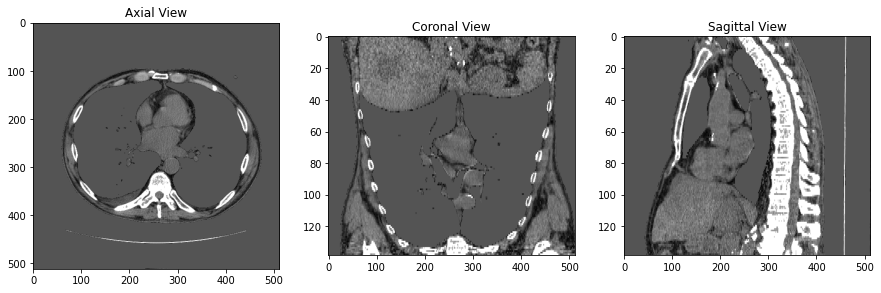

In [69]:
# similar to previous case, calculate axial, coronal and saggital aspect ratios
ax_aspect = PixelSpacing[1]/PixelSpacing[0] # axial aspect 
sag_aspect = PixelSpacing[1]/SliceThickness# saggital aspect
cor_aspect =  SliceThickness/PixelSpacing[0]# coronal aspect

# plot axial coronal and saggital slices of a middle slice 
plt.figure(figsize=(15,15))
a1 = plt.subplot(1,3,1)
plt.title("Axial View")

# obtain the middle axial slice from img_3D variable and store it in axial_slice
axial_slice = img_3D[:,:,img_3D.shape[2]//2]
plt.imshow(axial_slice, cmap="gray")
a1.set_aspect(ax_aspect)


a2 = plt.subplot(1,3,2)
plt.title("Coronal View")
# obtain the middle coronal slice from img_3D variable and store it in coronal_slice (Hint: use transpose after slicing)
coronal_slice = img_3D[img_3D.shape[0]//2,:,:].T
plt.imshow(coronal_slice, cmap="gray")
a2.set_aspect(cor_aspect)

a3 = plt.subplot(1,3,3)
plt.title("Sagittal View")
# obtain the middle sagittal slice from img_3D variable and store it in sagittal_slice 
sagittal_slice = np.rot90(img_3D[:,img_3D.shape[1]//2,:])
plt.imshow(sagittal_slice, cmap="gray")
a3.set_aspect(1/sag_aspect)

plt.show()


### What view does each of the following correspond to? (i.e., side view or back view, etc.)
 #### Ans.
### Which part of the body is visible in the above (eg: legs, arms, chest?)
 #### Ans.
### Have these images been windowed?
 #### Ans.

 - Answer the above questions. Compare the three views you obtained with the images in the results folder inside data. (double click to edit.) 